<div style="text-align: right">INFO 6106 Neural Modeling, Final Project, Milestone 1</div>
<div style="text-align: right">Lokeshwaran Balamurugan, Nitin Sai Varma Indukuri, Krishica Gopalakrishnan</div>

# Notebook 1: Rainfall Prediction Around Lake Michigan, Exploratory Data Analysis

Welcome to our **Exploratory data analysis Notebook**, where we dive into the weather patterns around the beautiful Lake Michigan. 🌧️🌊

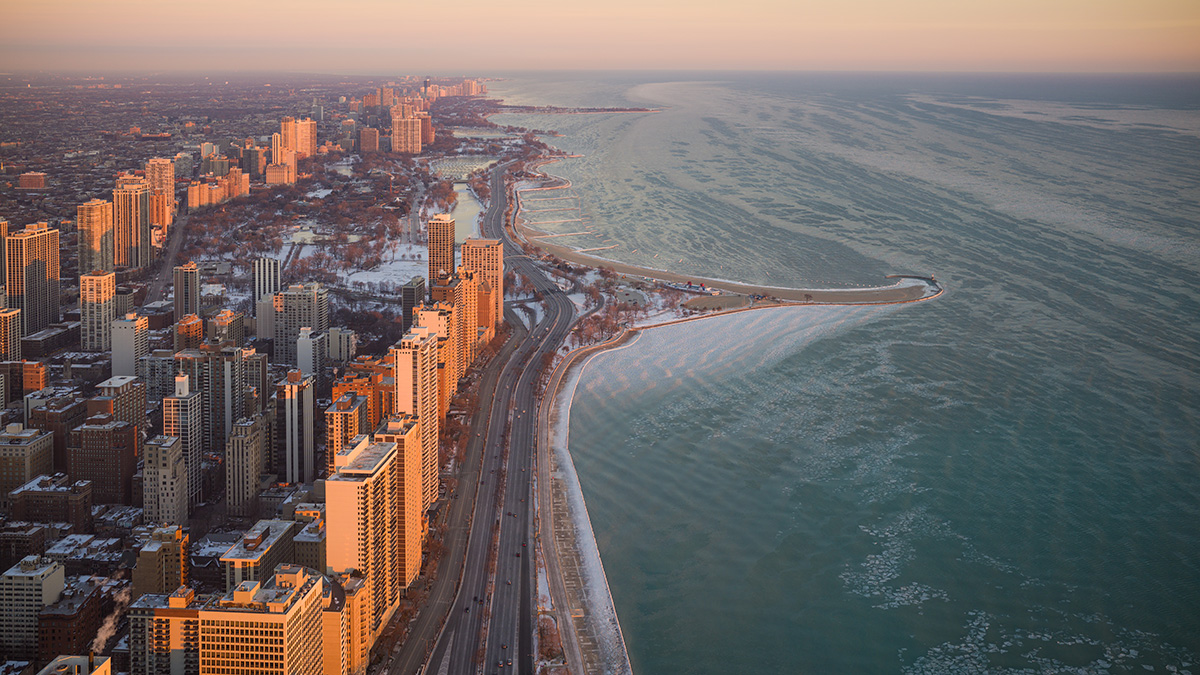

Lake Michigan, a stunning body of water bordered by the states of Wisconsin, Illinois, Indiana, and Michigan, we researched and found that is known for its unpredictable weather. Upon further reading we found out that over the years, this region has witnessed some intense weather events, from heavy rainstorms to massive flooding. Some major and notable moments are:

- **The 2008 Midwest Floods**: Lake Michigan and its surrounding areas were heavily impacted by extreme rainfall, which caused significant flooding. The heavy downpours in June 2008 led to swollen rivers and widespread flooding, especially in Illinois and Wisconsin.

- **Lake Michigan Storms (2020)**: In the summer of 2020, the Lake Michigan shoreline saw an uptick in storm activity, with intense rainfall events that impacted communities along the coast, causing flash floods and high water levels.

While all  of this seems intense, we understood how impactful and crucial the right understanding of data would be in determining and sorta pregventing natural disasters.In this notebook, we will analyze the rainfall patterns in the Lake Michigan region from 2006 onwards, uncovering how weather variables like temperature, humidity, and wind speed can help us predict precipitation. Let's take a deep dive into the data and uncover some interesting insights! 🌦️

**Objective:**
Data Visualization Notebook: ( 20 marks ) 
Note : Below are potential guidelines or ideas, you can choose to do them or not  
- Load and explore the meteorological and satellite image data.
- Plot distributions of key meteorological variables.
- Visualize time-series trends for precipitation and related features.
- Create correlation heatmaps to analyze relationships between features.
- Document findings and provide insights into data characteristics and challenges.




# 1. Loading the dataset

In [ ]:
# Define the path to the CSV file
df = '2006Fall_2017Spring_GOES_meteo_combined.csv'

# Load the dataset
les = pd.read_csv(csv_file)

# Display the first few rows
print("Initial DataFrame Head:")
display(les.head())

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44774 entries, 2006-10-01 to 2015-03-31
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time_UTC               44774 non-null  object        
 1   Date_CST               44774 non-null  object        
 2   Time_CST               44774 non-null  object        
 3   File_name_for_1D_lake  41955 non-null  object        
 4   File_name_for_2D_lake  41955 non-null  object        
 5   Lake_data_1D           44774 non-null  object        
 6   Lake_data_2D           44774 non-null  object        
 7   Temp (F)               44774 non-null  float64       
 8   RH (%)                 44774 non-null  float64       
 9   Dewpt (F)              44774 non-null  object        
 10  Wind Spd (mph)         44774 non-null  float64       
 11  Wind Direction (deg)   40673 non-null  float64       
 12  Peak Wind Gust(mph)    44774 non-null  obje

Columns such as Temp (F), RH (%), Precip (in), etc., are currently stored as object types, likely due to missing or non-numeric values. These need to be converted to numeric to perform further EDA

# 2. Data Cleaning

In [22]:
# Convert relevant columns to numeric (handle errors by coercing invalid parsing to NaN)
df['Temp (F)'] = pd.to_numeric(df['Temp (F)'], errors='coerce')
df['RH (%)'] = pd.to_numeric(df['RH (%)'], errors='coerce')
df['Precip (in)'] = pd.to_numeric(df['Precip (in)'], errors='coerce')
df['Wind Spd (mph)'] = pd.to_numeric(df['Wind Spd (mph)'], errors='coerce')
df['Visibility (mi)'] = pd.to_numeric(df['Visibility (mi)'], errors='coerce')

# Convert Date columns to datetime
df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], errors='coerce')

# Ensure there are no null values in these columns for time-series analysis
df.dropna(subset=['Temp (F)', 'RH (%)', 'Precip (in)', 'Wind Spd (mph)', 'Visibility (mi)', 'Date_UTC'], inplace=True)


In [23]:
df.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),DateTime_UTC
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48.0,86.0,...,4800,7000,10.0,984.0,1007.00,1006.80,0.00,45,NC,2006-10-01 00:00:00
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48.0,86.0,...,m,m,10.0,983.7,1006.50,1006.40,0.00,44,NC,2006-10-01 01:00:00
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,...,11000,m,10.0,982.7,1005.70,1005.40,0.00,45,NC,2006-10-01 02:00:00
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,...,m,m,10.0,982.0,1005.10,1004.70,0.00,44,NC,2006-10-01 03:00:00
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48.0,89.0,...,3500,m,8.0,982.0,1004.90,1004.70,0.02,46,NC,2006-10-01 04:00:00


# 3. Exploratory Data Analysis

In order for us to predict the rainfall category over lake michigan, we need to:
- Understand what our target variables are
- Their distribution over the span of the 10 years of data that we have.
- Temporal dependencies which will help us predict the rainfall category in the future.


## 3.1 Understanding Target Variable

Understanding the target variable in time-series data, like rainfall prediction, is crucial because it helps us identify its patterns, trends, and seasonality over time. This understanding enables us to detect dependencies on other variables (like temperature or humidity), recognize anomalies, and design models that effectively capture the temporal dynamics of rainfall. It also ensures that our predictions are grounded in the real-world behavior of rainfall.

So, let's get on with it then:

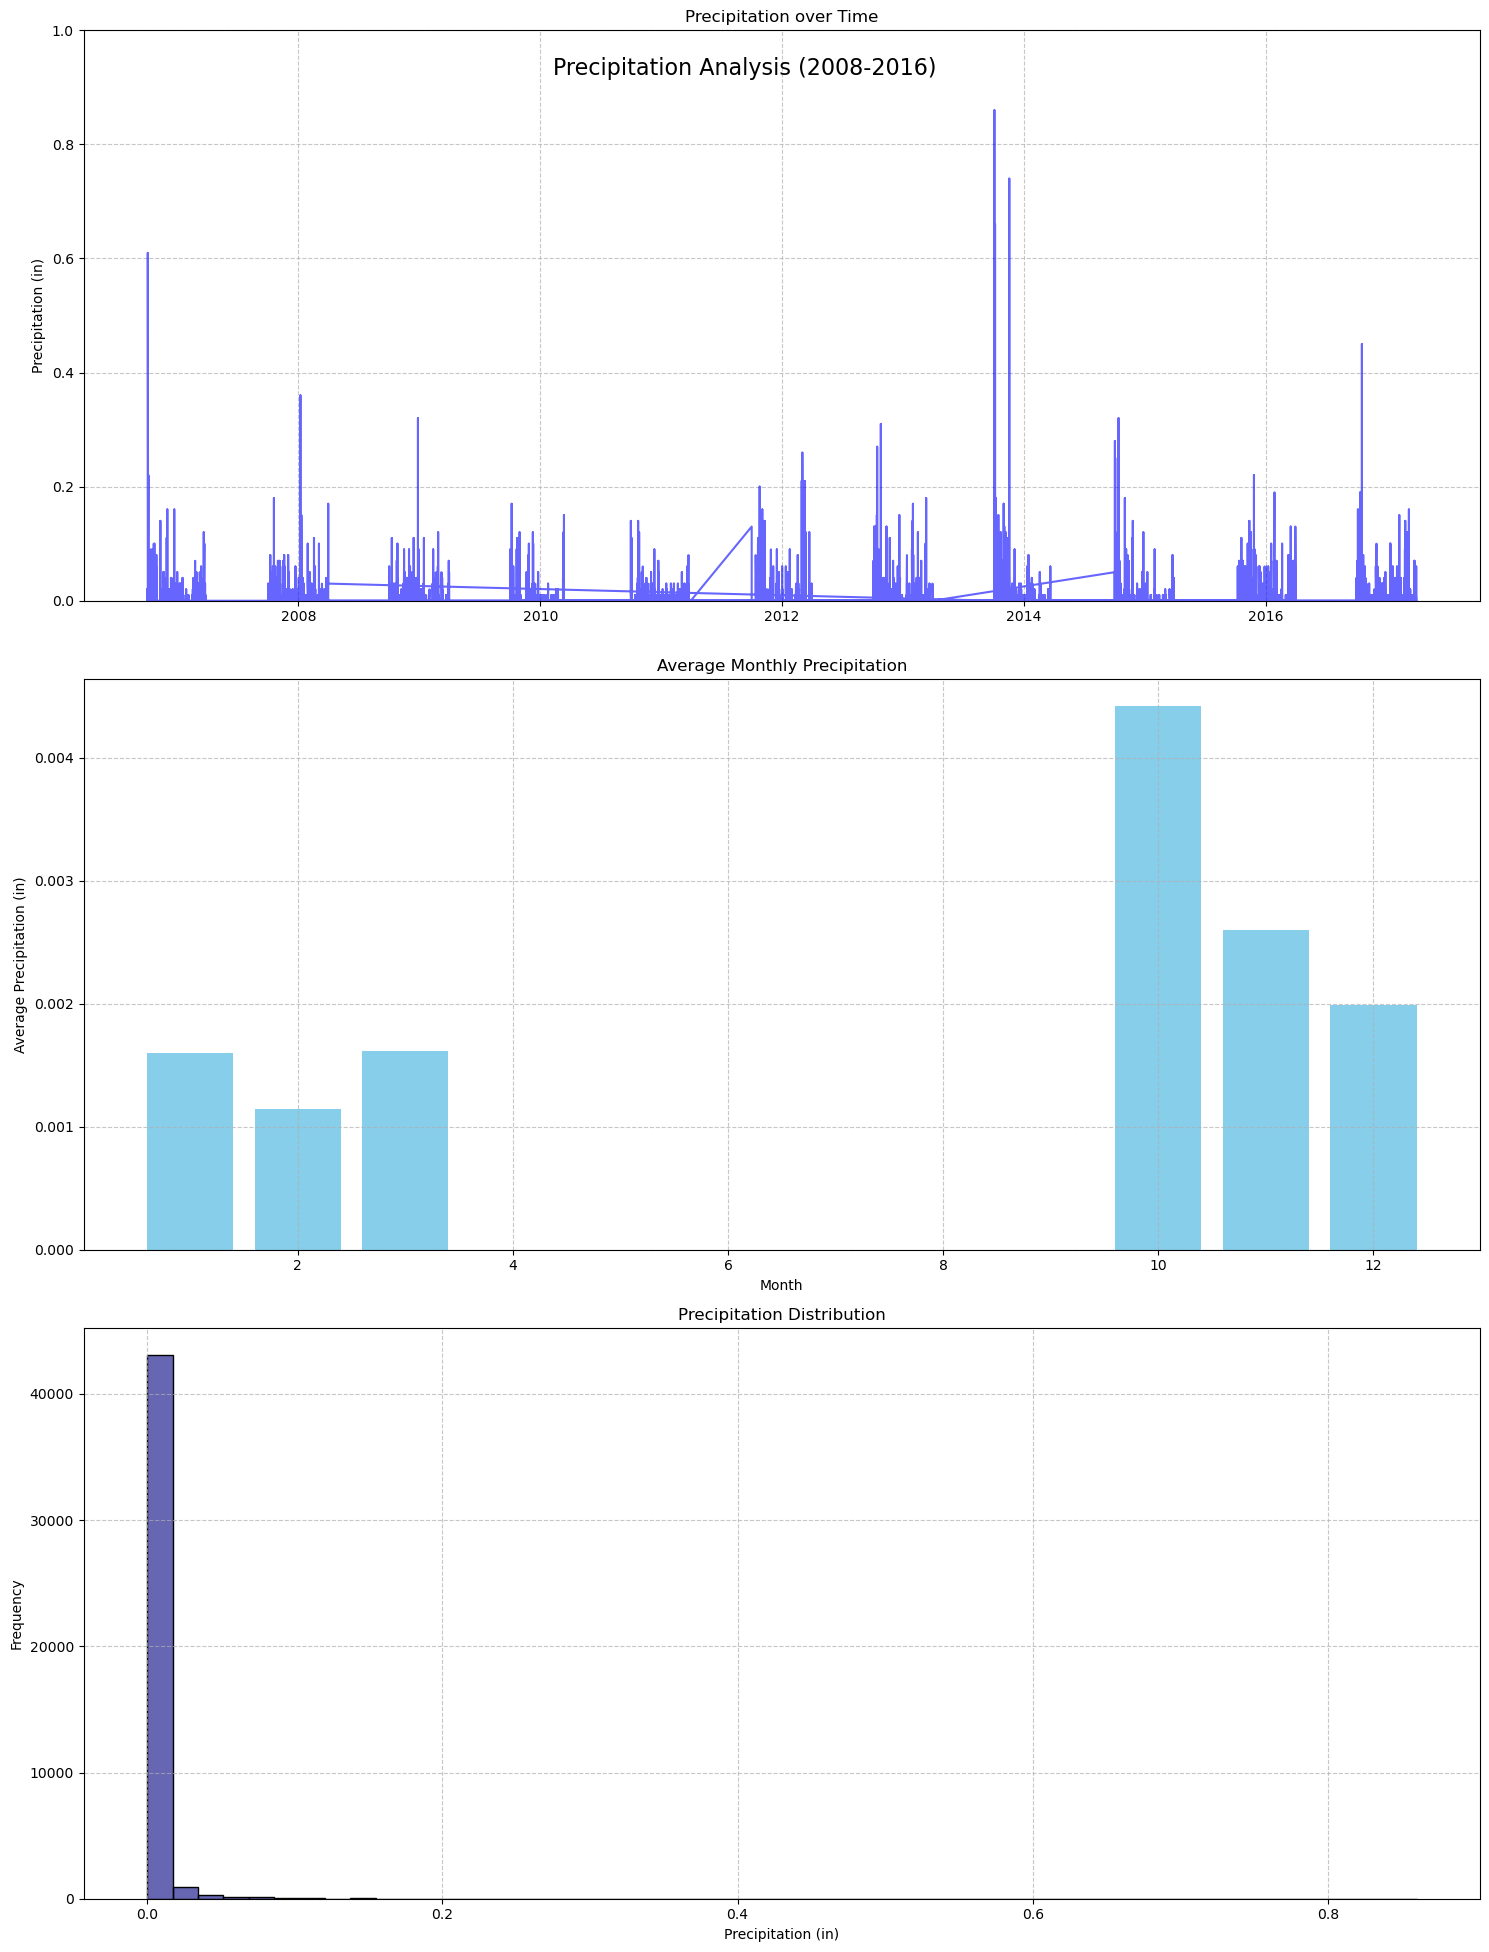

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

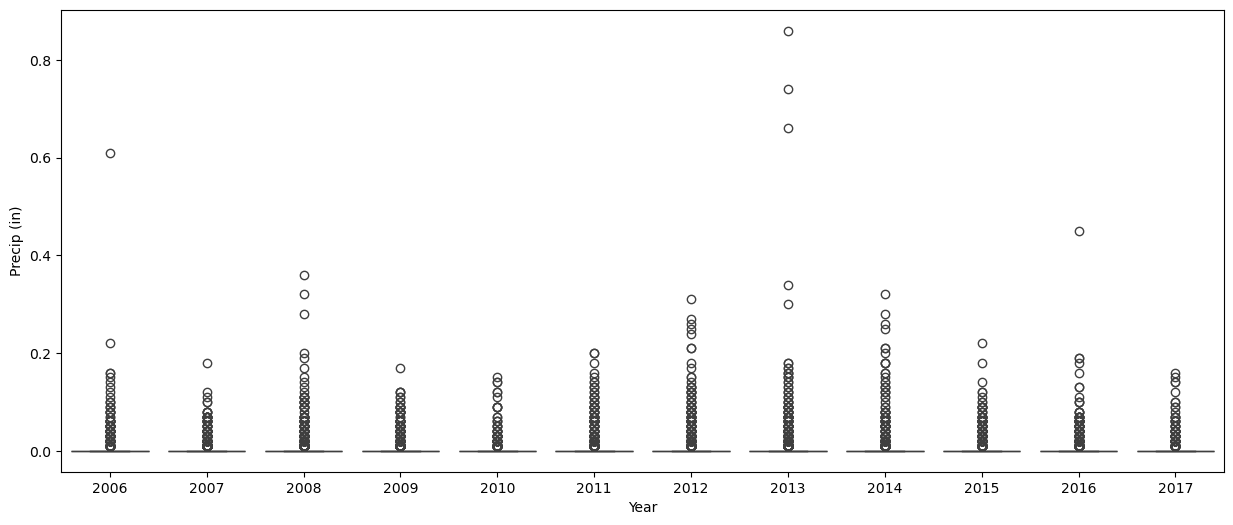

In [87]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('Precipitation Analysis (2008-2016)', fontsize=16, y=0.95)

# Plot 1: Precipitation Time Series
axes[0].plot(df.index, df['Precip (in)'], color='blue', alpha=0.6)
axes[0].set_title('Precipitation over Time')
axes[0].set_ylabel('Precipitation (in)')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_ylim(0, 1.0)  # Adjust based on your data

# Plot 2: Monthly Average Precipitation
monthly_precip = df.groupby(df.index.month)['Precip (in)'].mean()
axes[1].bar(monthly_precip.index, monthly_precip.values, color='skyblue')
axes[1].set_title('Average Monthly Precipitation')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Precipitation (in)')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Precipitation Distribution
sns.histplot(data=df['Precip (in)'], bins=50, ax=axes[2], color='navy', alpha=0.6)
axes[2].set_title('Precipitation Distribution')
axes[2].set_xlabel('Precipitation (in)')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Additional visualization: Box plot by year
plt.figure(figsize=(15, 6))
df['Year'] = df.index.year
sns.boxplot(x='Year', y='Precip (in)', data=df)
plt.title


The data and rainfall distribution analysis highlight significant environmental trends impacting Lake Michigan's water levels. Michigan's seventh wettest year, with precipitation 117% above average, underscores the persistent wet conditions from spring through early fall. These patterns are reflected in the distribution, revealing notable peaks during key years.


<b> Major Peaks</b>
- Highest precipitation peak observed in 2014 
- Secondary significant peak in 2008 (~0.6 inches)
- Notable peak in 2016 (~0.45 inches)

In 2014, the peak in lake levels according to our distribution actually was influenced by a combination of seasonal timing, weather, and environmental factors. Interestingly, despite record ice coverage (93.29%) reducing evaporation rates, the winter months and the start of the year experienced primarily rain rather than snow as seen in our distribution as well. This anomaly, combined with above-average water supplies and stable conditions, contributed to the observed rise in water levels. The rainfall distribution for 2014 supports this, showing the highest peak (~0.85 inches) aligning with these unusual precipitation patterns.

Late 2014 further illustrates this trend, with November and December seeing above-average rainfall as part of a broader increase in over-lake precipitation during the decade. Secondary peaks in 2008 and 2016 provide additional context, indicating how heavier rainfall in winter months influenced water levels. These shifts, driven by warmer air holding more moisture, mark a period of significant environmental change, with the rainfall distribution offering critical insights into these evolving patterns.


We found some news in the web related to the distribution
https://www.mlive.com/weather/2014/12/top_5_michigan_weather_events.html


# 4. Understanding correlation among variables

On top of understanding the target variable in our time-series data about rainfall, it’s equally important to understand how the different variables in the dataset relate to one another. This helps us uncover relationships and dependencies that could impact our predictions. To do this, we use a **correlation matrix**.

**What is a correlation matrix?**
A correlation matrix is a table that shows the correlation coefficients between multiple variables. These coefficients, which range from -1 to 1, quantify the strength and direction of the linear relationship between pairs of variables:
- A value close to 1 indicates a strong positive correlation (as one variable increases, so does the other).
- A value close to -1 indicates a strong negative correlation (as one variable increases, the other decreases).
- A value close to 0 suggests no significant linear relationship.

For example, we can use a correlation matrix to see how Temperature (F) correlates with Relative Humidity (RH %) or how Wind Speed (mph) relates to Visibility (mi). This helps identify relationships that might be critical for predicting rainfall.

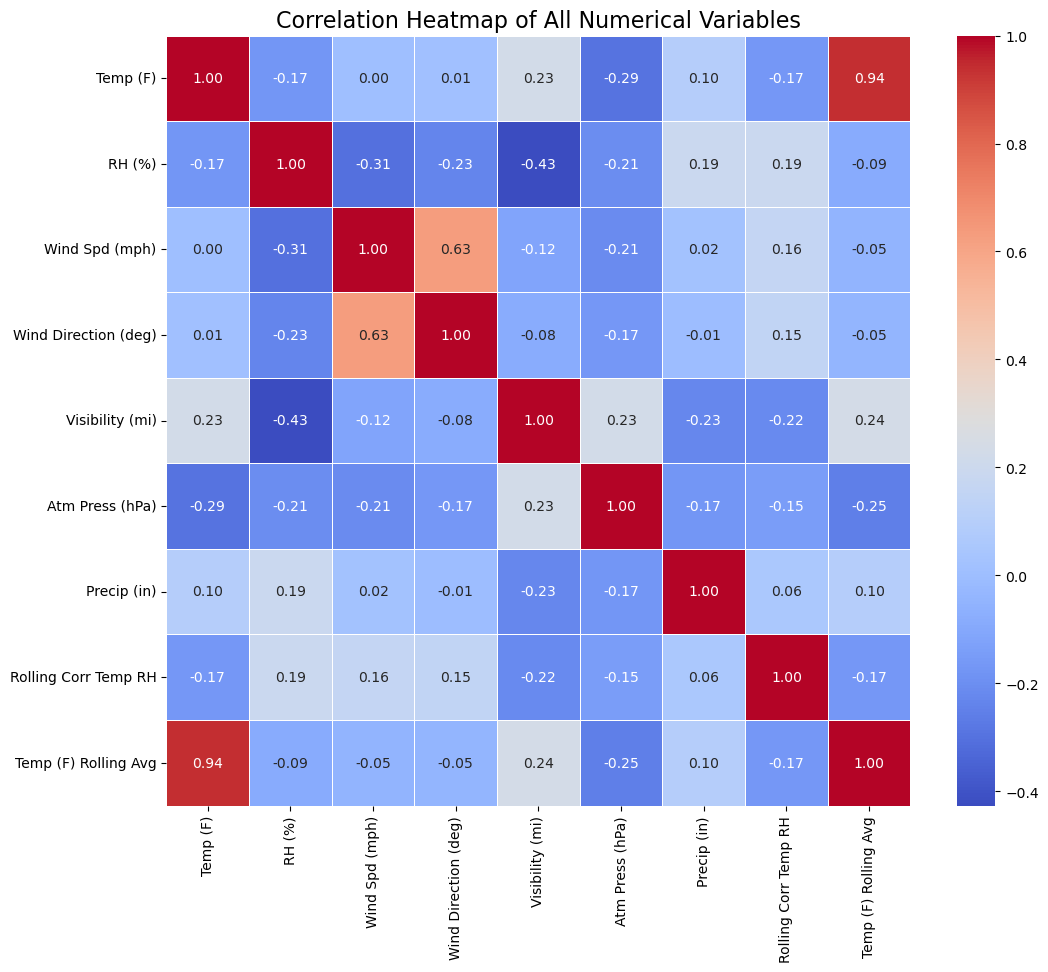

In [53]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Numerical Variables', fontsize=16)
plt.show()

We can see notably **significant relationships**, such as:
- Primary Weather Indicators:
    - Relative Humidity shows the strongest relationship with `precipitation (0.19)`
    - `Visibility` has the strongest negative correlation (-0.23)
    - Atmospheric pressure shows meaningful `negative correlation (-0.17)`

- Secondary Patterns:
    - Temperature variables show `moderate correlations` with visibility `(0.23-0.24)`
    - `Wind speed` and `direction` are **highly correlated (0.63)**
    - `RH` shows negative correlations with most variables, `particularly visibility (-0.43)`

- Feature Selection Implications
For precipitation category prediction, these variables offer complementary information:
    - **RH and Visibility** capture moisture conditions
    - **Temperature and Pressure** represent atmospheric energy states
    - **Wind variables** describe moisture transport mechanisms
  
**Key Insights**

- **Strong Predictors:**
    - **Visibility** shows the strongest overall correlation, suggesting that as visibility decreases, precipitation likelihood increases
    - **Relative Humidity(RH)** demonstrates the strongest positive correlation, indicating higher humidity is associated with increased precipitation
    - **Atmospheric Pressure** shows a meaningful negative correlation, typical of weather systems associated with precipitation
  
- **Weak Correlations:**
    - **Wind Speed(0.02)** and **Wind Direction(-0.01)** show minimal direct correlation
    - **Temperature (0.10)** shows a weak positive correlation
  
This correlation pattern suggests that visibility and relative humidity are the most reliable indicators for precipitation prediction, while wind parameters may serve better as indirect or conditional predictors.Lets try to go ahead and explore the relationships to find out any meaningful information that could be used for our modelling or prediction.





# 5. Analysing Significant Indicators together

Analyzing significant indicators together helps us understand how variables interact and collectively influence the target, like rainfall. This approach captures multivariate dependencies, improving prediction accuracy by providing a holistic view of the data. It also helps
- Identify key drivers
- Simplify the dataset and 
- Detect anomalies or complex patterns 

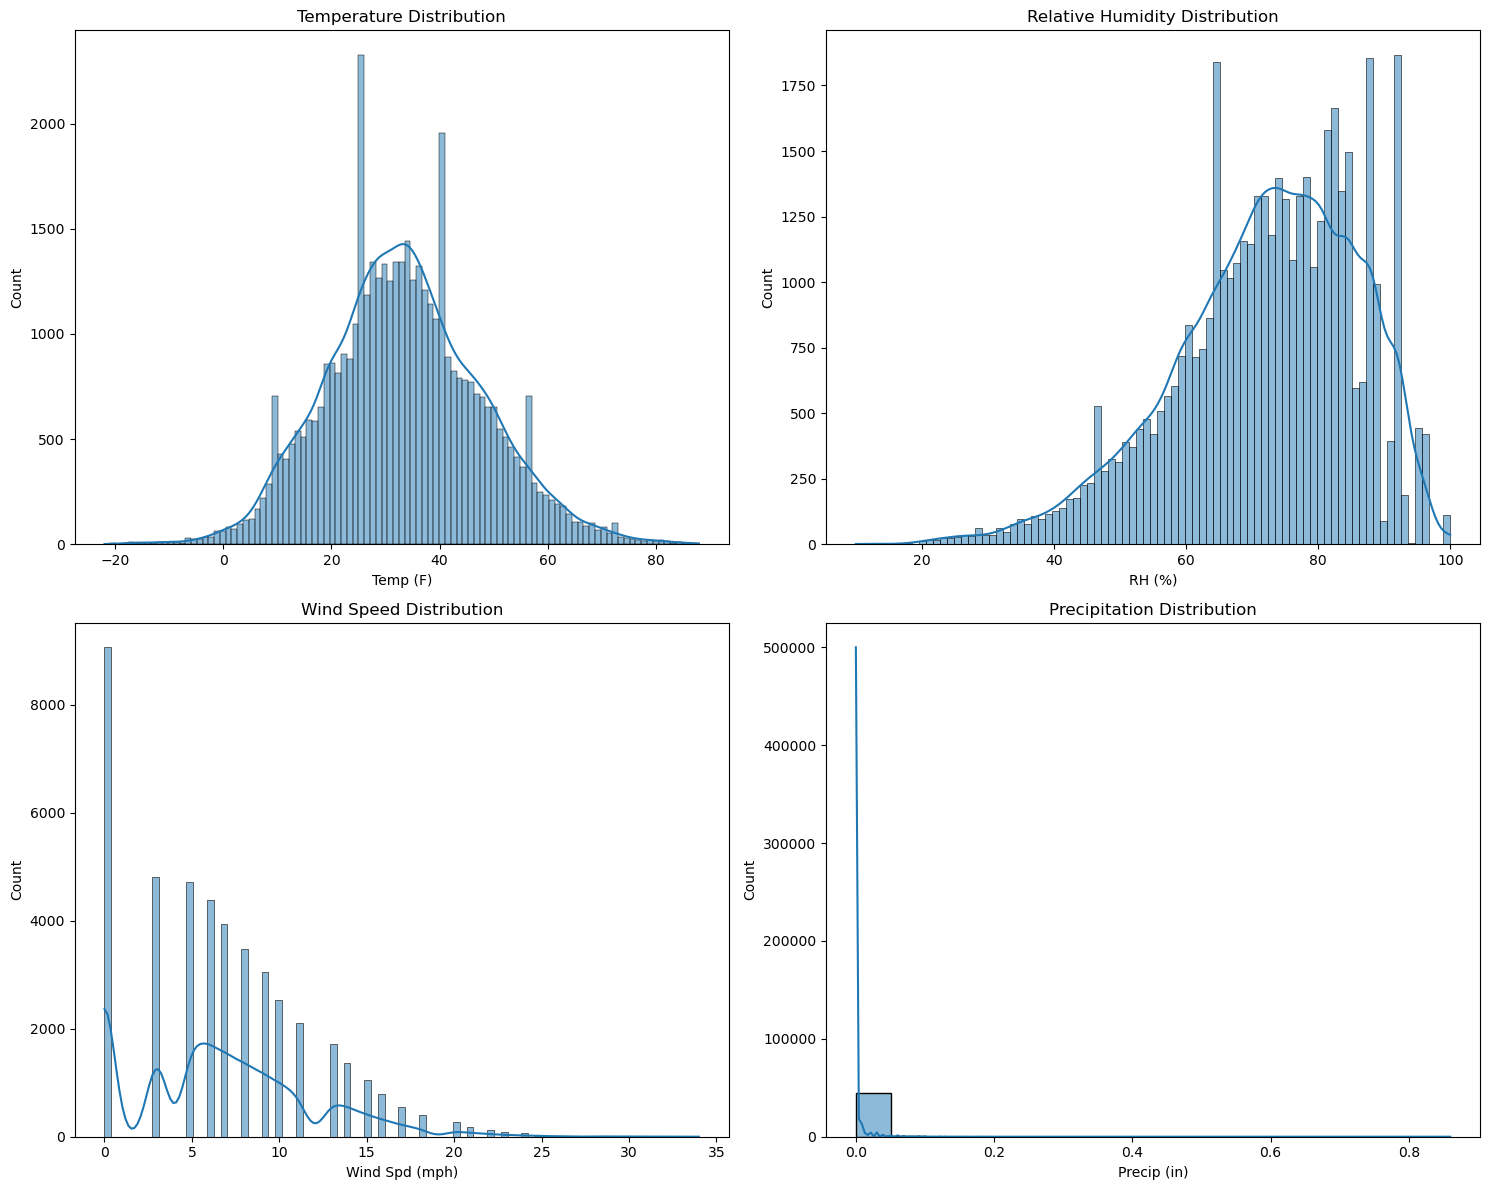

In [59]:
#  Distribution of key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(df['Temp (F)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')
sns.histplot(df['RH (%)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Relative Humidity Distribution')
sns.histplot(df['Wind Spd (mph)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed Distribution')
sns.histplot(df['Precip (in)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Precipitation Distribution')
plt.tight_layout()
plt.show()

**Primary Weather Indicators**
- Relative Humidity (RH):  
  - Shows the strongest positive correlation (**0.19**) with precipitation.
- Visibility:  
  - Demonstrates the strongest negative correlation (**-0.23**) with precipitation.
- Atmospheric Pressure:  
  - Displays a notable negative correlation (**-0.17**) with precipitation.

**Secondary Weather Factors**
- Temperature:  
  - Weak positive correlation (**0.10**) with precipitation.
- Wind Speed:  
  - Negligible correlation (**0.02**) with precipitation.
- Wind Direction:  
  - Minimal negative correlation (**-0.01**) with precipitation.
 
**Distribution Patterns**
- Visibility vs Precipitation: Shows clear inverse relationship with higher precipitation at lower visibility ranges
- RH vs Precipitation: Demonstrates positive correlation with increased precipitation at higher humidity levels
- Pressure Systems: Lower pressure systems tend to correlate with precipitation events


## 5.1 Visibility and precipitation

The correlation between Visibility and Precipitation (-0.23) represents one of the strongest direct correlations with our target variable (precipitation), making this pair particularly interesting for analysis. 

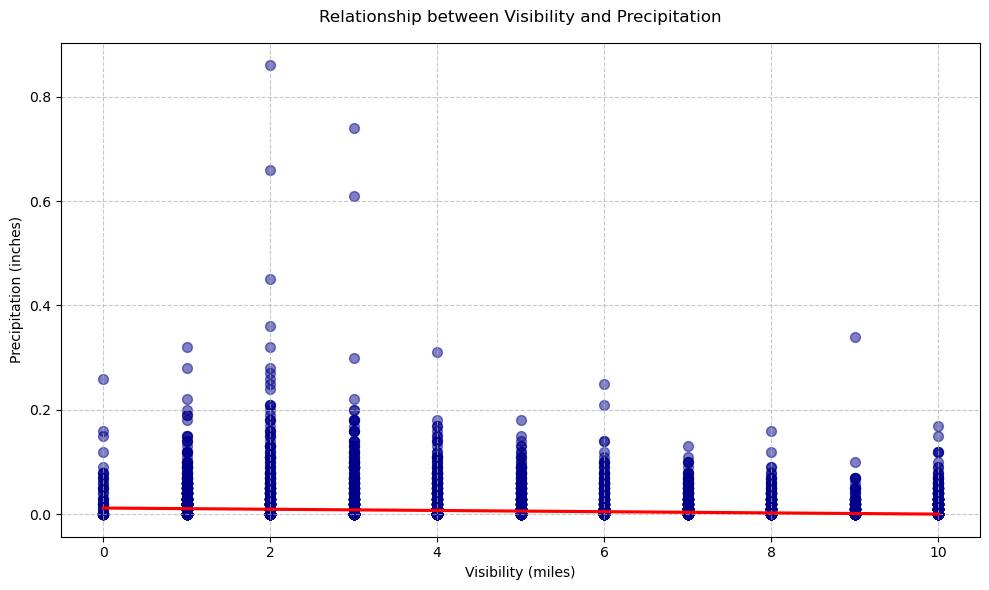

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Visibility (mi)'], df['Precip (in)'], 
            alpha=0.5, color='darkblue', s=50)

# Add trend line
sns.regplot(x='Visibility (mi)', y='Precip (in)', 
            data=df, scatter=False, color='red')

# Customize the plot
plt.title('Relationship between Visibility and Precipitation', 
          fontsize=12, pad=15)
plt.xlabel('Visibility (miles)', fontsize=10)
plt.ylabel('Precipitation (inches)', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Clear inverse relationship: as visibility increases, precipitation tends to decrease** 
- Most weather observations show clear conditions (high visibility, no precipitation)
- Heavy precipitation events are rare but consistently associated with reduced visibility
- Strong negative correlation between visibility and precipitation (-0.23)
- Higher precipitation amounts (0.6-0.8 inches) occur at lower visibility ranges (0-2 miles)
- Maximum visibility (10 miles) corresponds to minimal precipitation

The relationship follows expected meteorological principles where precipitation events typically reduce visibility through various atmospheric processes

## 5.2 Visibility and Relative Humidity

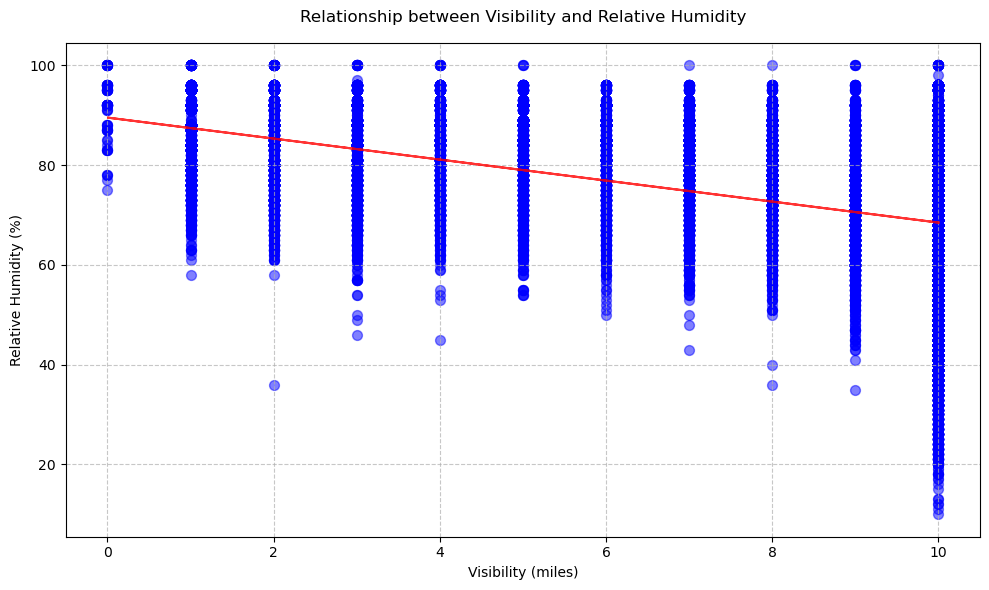

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Visibility (mi)'], df['RH (%)'], alpha=0.5, color='blue', s=50)

# Add trend line
z = np.polyfit(df['Visibility (mi)'], df['RH (%)'], 1)
p = np.poly1d(z)
plt.plot(df['Visibility (mi)'], p(df['Visibility (mi)']), "r-", alpha=0.8)

# Customize the plot
plt.title('Relationship between Visibility and Relative Humidity', 
          fontsize=12, pad=15)
plt.xlabel('Visibility (miles)', fontsize=10)
plt.ylabel('Relative Humidity (%)', fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**High Humidity as a Precursor to Precipitation**
- Elevated humidity levels indicate higher moisture in the air, a necessary condition for precipitation.
- The clustering at higher Relative Humidity (RH%) suggests conditions favoring precipitation events like fog, mist, or rain.

**Low Visibility as a Signal of Rain or Fog**
- Reduced visibility is often caused by high moisture content in the atmosphere, leading to fog, rain, or haze.
- This supports the expectation that periods of low visibility coincide with heavy or light rainfall conditions.

**How does this quantify the Predictive Value that we require?**
- The inverse relationship between visibility and RH can help identify potential precipitation events.
- For example:
  - If RH approaches saturation (close to 100%) and visibility drops, rain is more likely to occur.


## 5.3 Windspeed and relative humidity

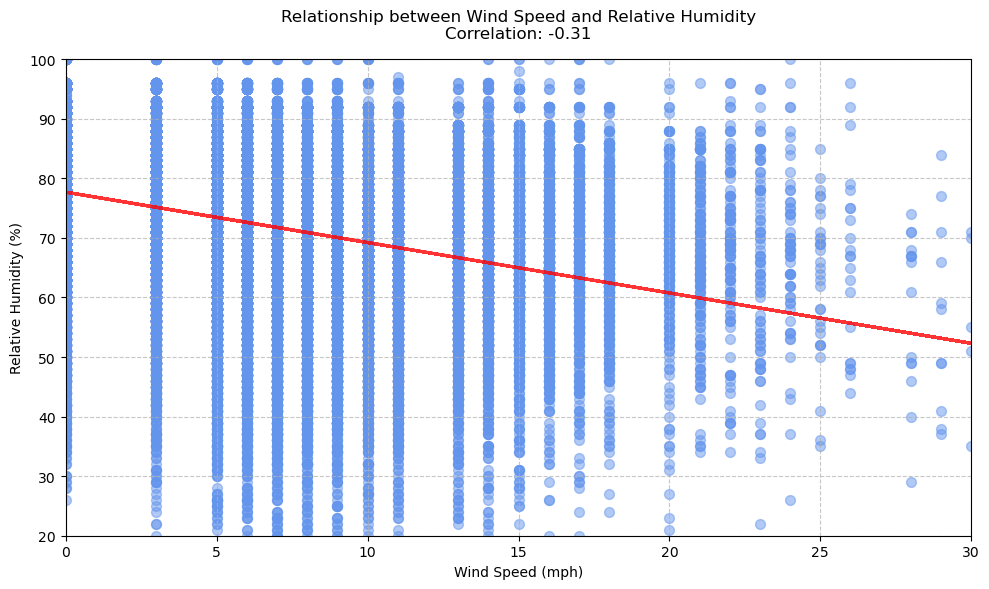

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot scatter points
plt.scatter(df['Wind Spd (mph)'], df['RH (%)'], 
           alpha=0.5, color='cornflowerblue', s=50)

# Add trend line
z = np.polyfit(df['Wind Spd (mph)'], df['RH (%)'], 1)
p = np.poly1d(z)
plt.plot(df['Wind Spd (mph)'], p(df['Wind Spd (mph)']), 
         "r-", alpha=0.8, linewidth=2)

# Customize the plot
plt.title('Relationship between Wind Speed and Relative Humidity\nCorrelation: -0.31', 
          fontsize=12, pad=15)
plt.xlabel('Wind Speed (mph)', fontsize=10)
plt.ylabel('Relative Humidity (%)', fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits
plt.xlim(0, 30)
plt.ylim(20, 100)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

This visualization shows:
- A **moderate negative correlation (-0.31)** between wind speed and **relative humidity**
- **Higher wind speeds** tend to correspond with **lower humidity levels**
- Most observations cluster between **0-15 mph** wind speeds
- **Relative humidity** values spread across **20-100%**
- The red trend line clearly shows the **negative relationship** 

The relationship makes meteorological sense as higher wind speeds tend to mix and disperse moisture in the air, leading to lower relative humidity values.

## 5.4 Relative humidity and Temperature

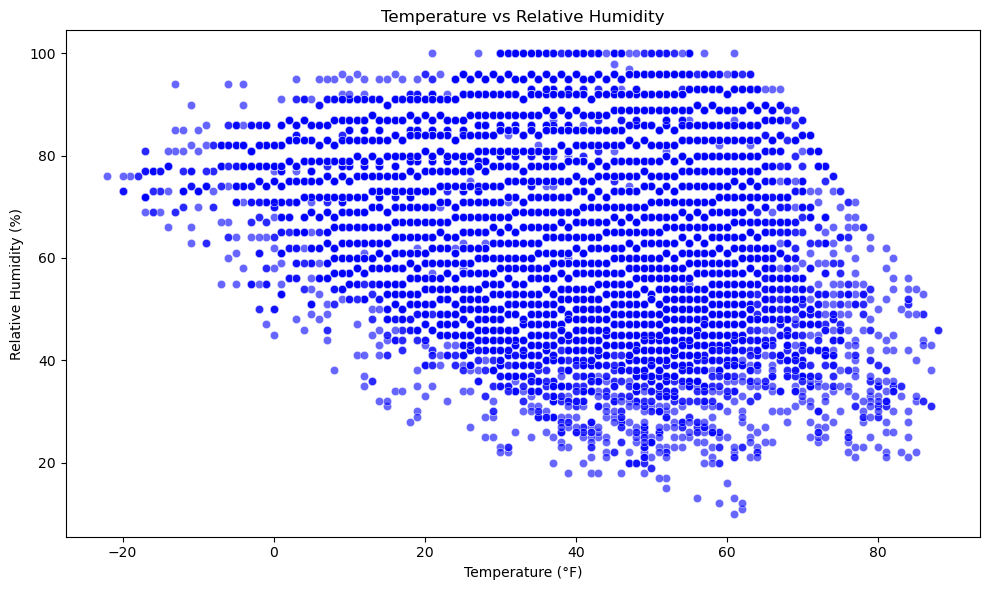

In [75]:
# Scatter plot for Temperature vs Relative Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp (F)', y='RH (%)', color='blue', alpha=0.6)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Relative Humidity (%)')
plt.tight_layout()
plt.show()


By studying these variables together, we can understand how wind might influence humidity levels, indirectly affecting precipitation patterns.

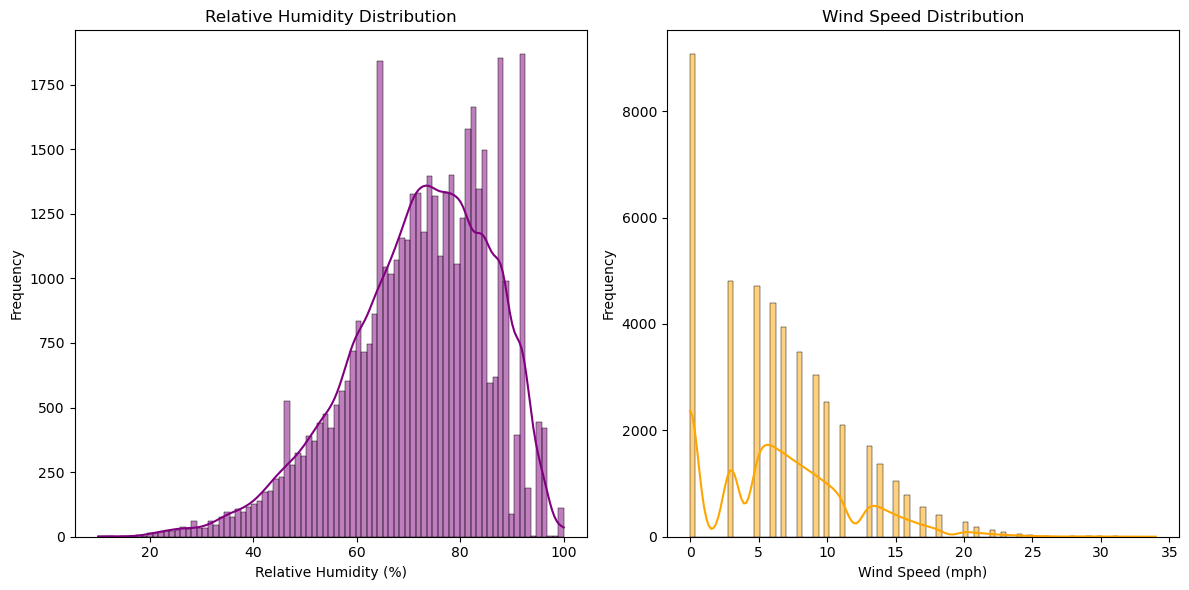

In [76]:
# Plot Relative Humidity and Wind Speed distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['RH (%)'], kde=True, ax=axes[0], color='purple')
axes[0].set_title('Relative Humidity Distribution')
axes[0].set_xlabel('Relative Humidity (%)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Wind Spd (mph)'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Wind Speed Distribution')
axes[1].set_xlabel('Wind Speed (mph)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [72]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create wind speed categories
# wind_categories = [(0,5), (5,10), (10,15), (15,20), (20,25), (25,30)]
# labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

# # Create figure
# plt.figure(figsize=(12, 6))

# # Create lists to store RH values for each wind speed category
# rh_by_category = []
# for low, high in wind_categories:
#     mask = (df['Wind Spd (mph)'] >= low) & (df['Wind Spd (mph)'] < high)
#     rh_by_category.append(df[mask]['RH (%)'])

# # Create box plot
# plt.boxplot(rh_by_category, labels=labels)

# # Customize the plot
# plt.title('Relative Humidity Distribution by Wind Speed Category', fontsize=12)
# plt.xlabel('Wind Speed (mph) Category', fontsize=10)
# plt.ylabel('Relative Humidity (%)', fontsize=10)

# # Add grid
# plt.grid(True, linestyle='--', alpha=0.3)

# # Set y-axis limits
# plt.ylim(20, 100)

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()

### Decreasing Trend:
- There is a clear decreasing trend in **Relative Humidity (RH)** as wind speed increases, indicating an **inverse relationship** between these two variables.
- The 0-5 mph wind speed category has the highest median RH at around 80%, suggesting that calmer wind conditions allow for higher moisture retention in the air.
- As **wind speed increases**, the **median RH gradually decreases** across the categories, reflecting the drying effect that stronger winds have on atmospheric moisture.
- **Higher wind speed categories show a wider spread of RH values**, indicating that wind speed leads to more variability in moisture conditions.
- Notable outliers are observed in the lower wind speed ranges, where RH values can occasionally be much lower than expected for calm wind conditions, pointing to anomalies in those cases.

# 6. Secondary feature indicators 

Now, let's try to understand secondary feature indicators, such as Wind Speed, Wind direction and temperature.

## 6.1 Temperature around the peak times

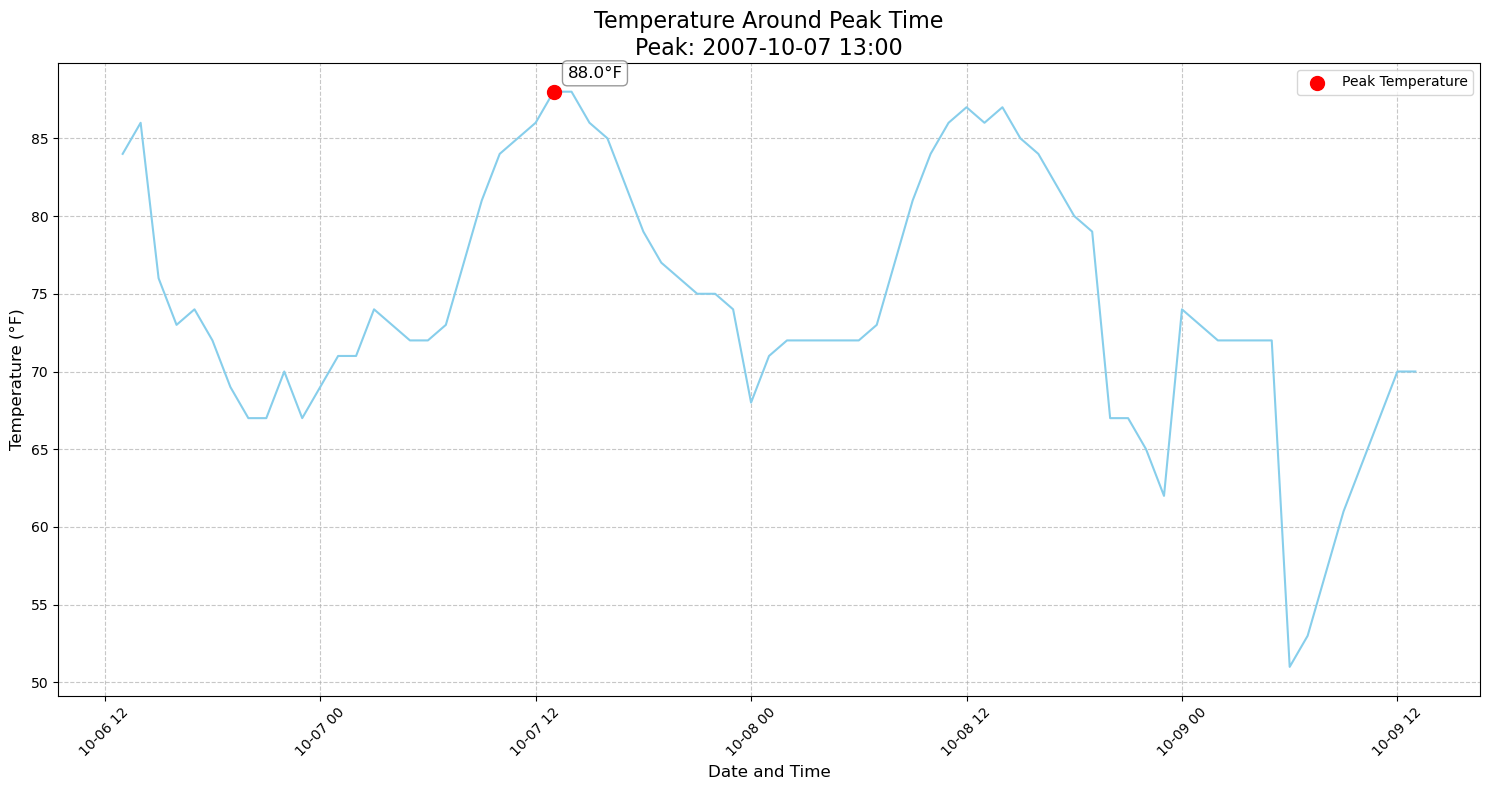

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Finding peak hour and date
peak_hour = df.groupby('DateTime_UTC')['Temp (F)'].mean().idxmax()
peak_date = df.loc[df['Temp (F)'].idxmax(), 'DateTime_UTC']

# Filtering data for 3 days around the peak time
start_date = peak_date - pd.Timedelta(days=1)
end_date = peak_date + pd.Timedelta(days=2)
df_peak = df[(df['DateTime_UTC'] >= start_date) & (df['DateTime_UTC'] <= end_date)]

# Creating the plot
plt.figure(figsize=(15, 8))
sns.lineplot(x='DateTime_UTC', y='Temp (F)', data=df_peak, color='skyblue')

# Highlighting the peak temperature
plt.scatter(peak_date, df.loc[df['DateTime_UTC'] == peak_date, 'Temp (F)'].values[0], 
            color='red', s=100, zorder=5, label='Peak Temperature')

plt.title(f'Temperature Around Peak Time\nPeak: {peak_date.strftime("%Y-%m-%d %H:%M")}', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.xticks(rotation=45)

# Annotations
peak_temp = df.loc[df['DateTime_UTC'] == peak_date, 'Temp (F)'].values[0]
plt.annotate(f'{peak_temp:.1f}°F', (peak_date, peak_temp), 
             xytext=(10, 10), textcoords='offset points', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Customizing grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding  legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

## 6.2 Temperature and Dew Point

**Why analyze these variables together?** 
By comparing Temperature and Dew Point, we can evaluate how close the atmosphere is to saturation. This helps in determining the likelihood of cloud formation and precipitation. For example:
- If the temperature is close to the dew point, the air is nearly saturated, increasing the chance of rain.
- A significant difference between these values suggests drier air with less potential for immediate precipitation.

Visualizing the distributions of these variables provides insights into their range and typical conditions, enhancing our ability to model and predict rainfall patterns.

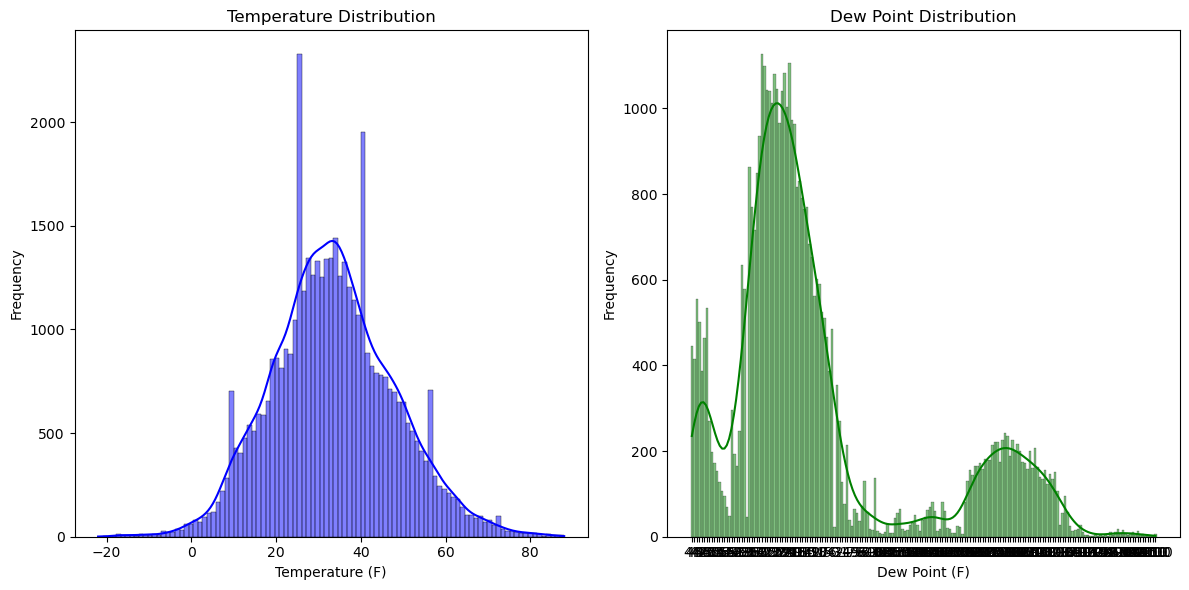

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temperature and Dew Point distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Temp (F)'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature (F)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Dewpt (F)'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Dew Point Distribution')
axes[1].set_xlabel('Dew Point (F)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6.3 Wind speed and temperature

Wind speed and temperature can show interesting patterns, as temperature affects the movement of air masses. Higher temperatures, especially during the day, can lead to stronger winds due to thermal convection.

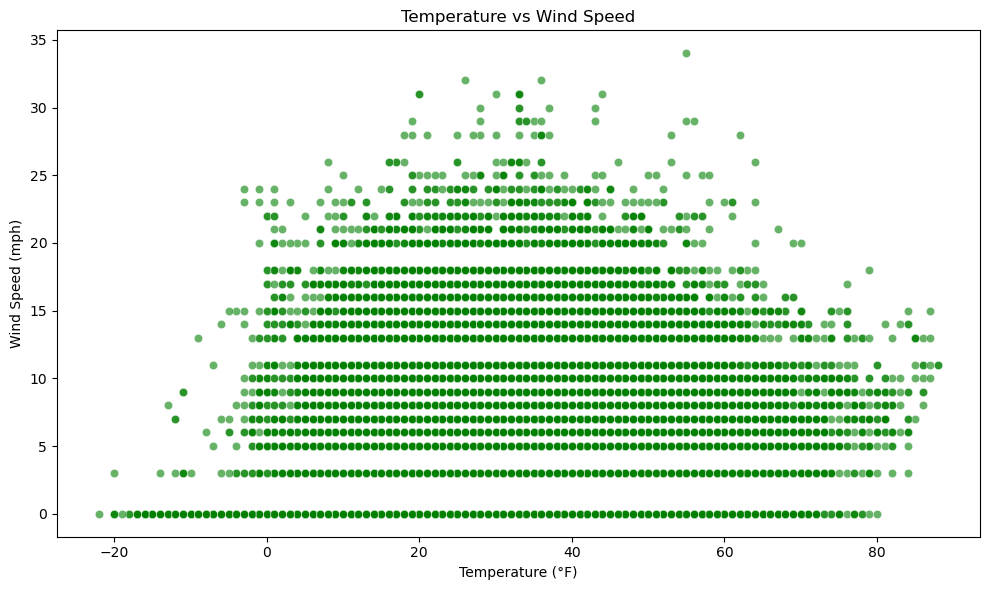

In [43]:
# Scatter plot for Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp (F)', y='Wind Spd (mph)', color='green', alpha=0.6)
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°F)')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.show()


**Temperature-Wind Speed Dynamics**
- Temperature range spans from -20°F to 80°F
- Wind speeds cluster heavily between 0-15 mph
- Sparse observations at temperature extremes


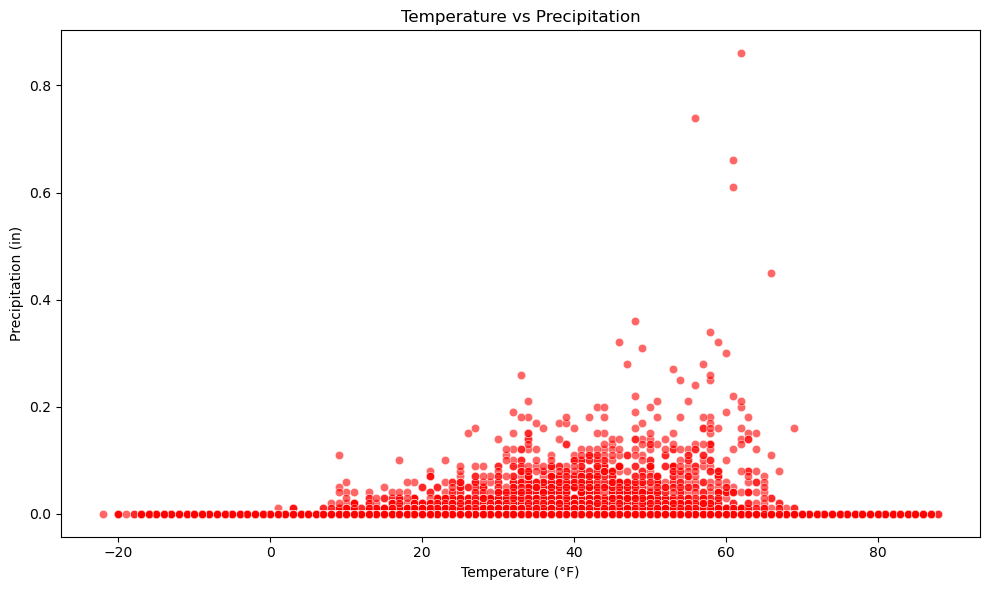

In [44]:
# Scatter plot for Temperature vs Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp (F)', y='Precip (in)', color='red', alpha=0.6)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°F)')
plt.ylabel('Precipitation (in)')
plt.tight_layout()
plt.show()


- Most precipitation occurs between 20-60°F
- Peak rainfall (~0.85 inches) around 60°F
- Very little precipitation at extreme temperatures
- Dense cluster of light rainfall (0-0.2 inches) across all temps

The relationship between these variables paints a picture of Lake Michigan's weather system where moderate temperatures have the most active weather patterns. The clustering of observations suggests optimal conditions for both wind and precipitation events occur within specific temperature ranges, while extreme temperatures tend to suppress weather activity

## 6.4 Correlation Between Temperature (Temp (F)) and Relative Humidity (RH (%))

These relationships suggest that Lake Michigan's weather patterns are most active in moderate temperature ranges, with complex interactions between humidity, precipitation, and wind speed creating distinct weather patterns throughout the year

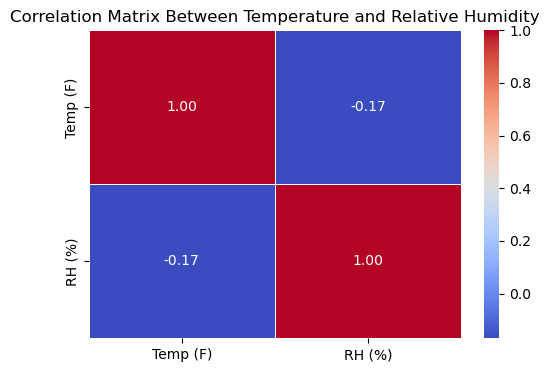

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the correlation matrix is already calculated
correlation = df[['Temp (F)', 'RH (%)']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Title and labels
plt.title('Correlation Matrix Between Temperature and Relative Humidity')
plt.show()


The data highlights intricate interactions among temperature, precipitation, and wind patterns in the Lake Michigan region. The correlation matrix reveals a weak negative correlation (-0.17) between temperature and humidity, indicating that as temperatures increase, humidity tends to decrease slightly.

Precipitation patterns further emphasize this complexity, with most activity observed in the 20-60°F range. Notably, peak rainfall (~0.85 inches) occurs near 60°F, suggesting that moderate temperatures create optimal conditions for precipitation, while extreme temperatures remain relatively dry.

Wind speed analysis reveals distinct horizontal banding across temperature ranges. Wind speeds predominantly range from 0-15 mph, occasionally reaching up to 35 mph, especially during moderate temperatures. This banding suggests a strong linkage between wind dynamics and temperature variations.

## 6.5 Heatmap for Correlation between the Dominant Secondary Indicators 

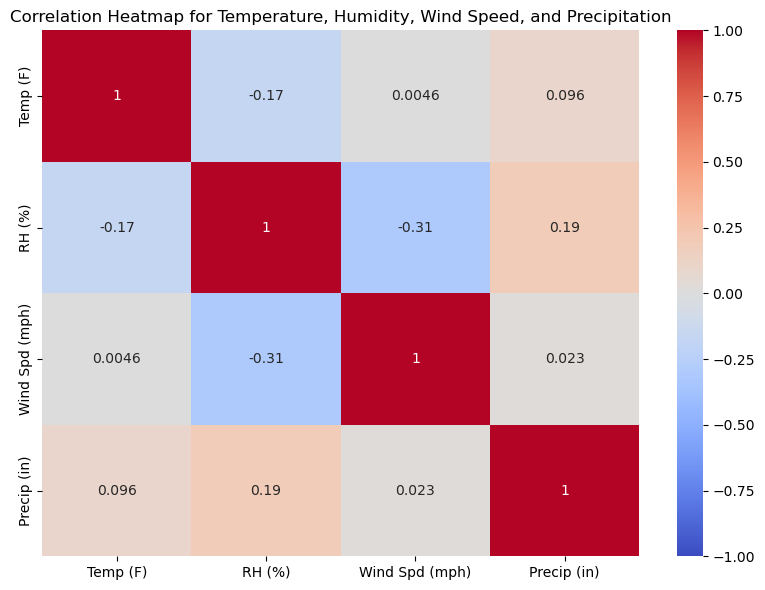

In [45]:
# Calculate correlation matrix
corr_matrix = df[['Temp (F)', 'RH (%)', 'Wind Spd (mph)', 'Precip (in)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Temperature, Humidity, Wind Speed, and Precipitation')
plt.tight_layout()
plt.show()


# 7. Plotting Visibility and Precipitation distributions

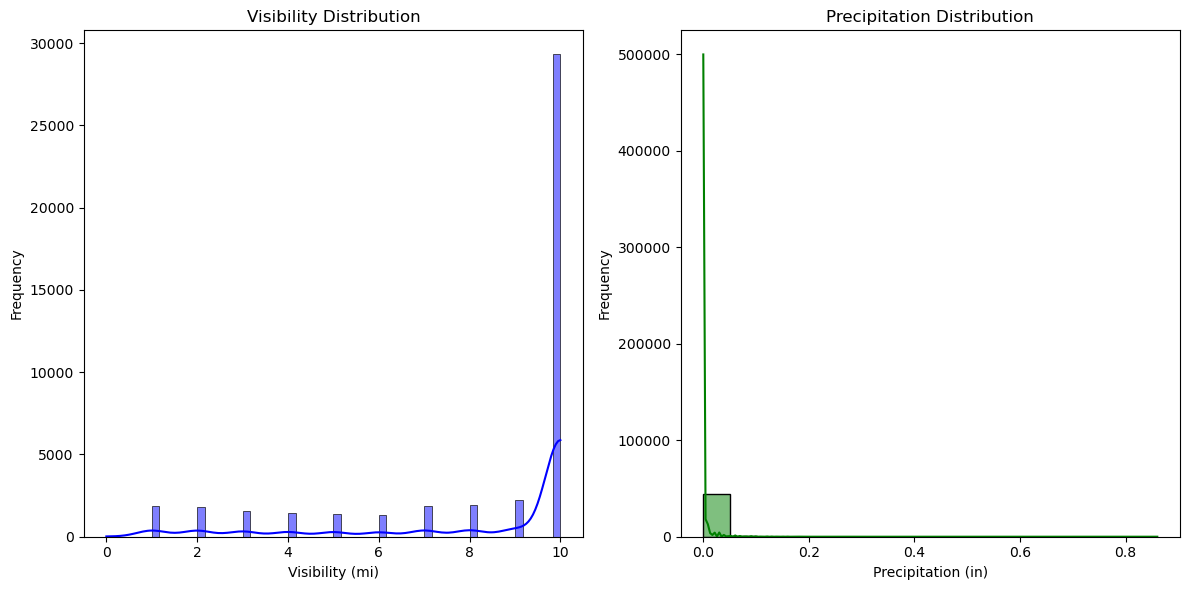

In [34]:
# Plot Visibility and Precipitation distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Visibility (mi)'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Visibility Distribution')
axes[0].set_xlabel('Visibility (mi)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Precip (in)'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Precipitation Distribution')
axes[1].set_xlabel('Precipitation (in)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



**Weather Pattern Implications:**
- The high frequency of good visibility (**10 miles**) suggests predominantly clear weather conditions.
- Lower visibility events correlate with **precipitation events**, though not all reduced visibility is due to precipitation.
- The precipitation pattern indicates mostly **dry conditions** with occasional rain events.

**What does this tell us about the data distribution characteristics?**
- **Visibility** shows a **multimodal distribution** with distinct peaks.
- **Precipitation** follows a typical weather pattern distribution where **dry conditions dominate**.
- Both variables exhibit **non-normal distributions**, suggesting complex atmospheric interactions.


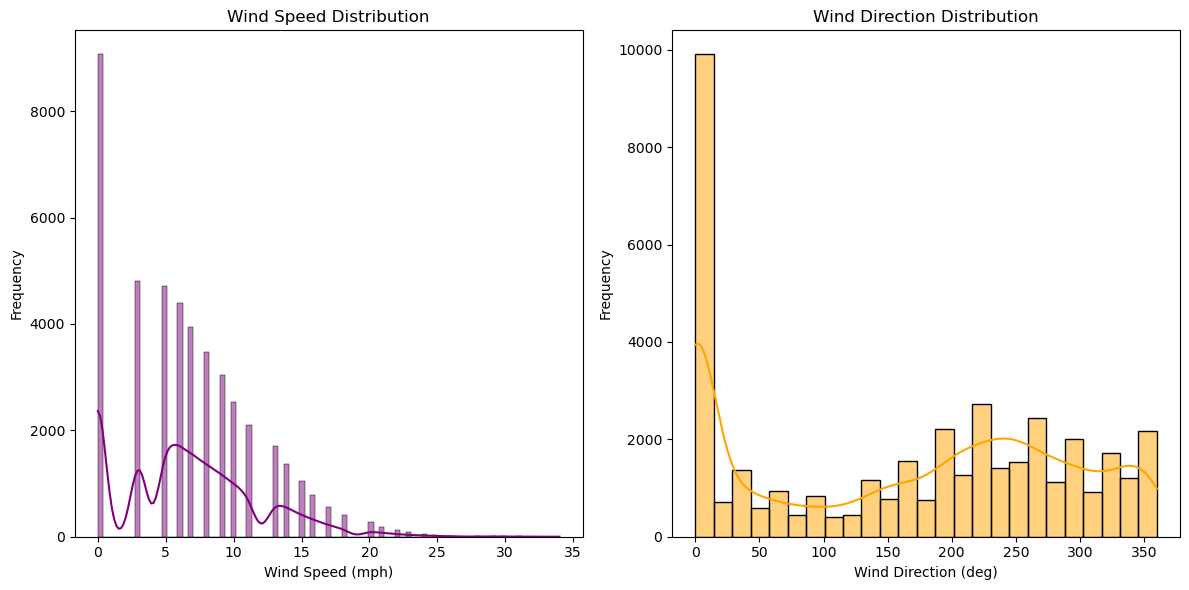

In [82]:
# Plot Wind Speed and Wind Direction distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Wind Spd (mph)'], kde=True, ax=axes[0], color='purple')
axes[0].set_title('Wind Speed Distribution')
axes[0].set_xlabel('Wind Speed (mph)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Wind Direction (deg)'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Wind Direction Distribution')
axes[1].set_xlabel('Wind Direction (deg)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Wind Patterns**
   - Dominant low-speed regime (0-10 mph)
   - Clear directional preferences indicating local weather patterns
   - Exponential decrease in frequency with increasing speed

**Humidity Relationships**
   - Strong negative correlation with visibility (-0.43)
   - Systematic decrease with increasing wind speed
   - Higher variability in low wind conditions

**Precipitation Characteristics**
   - Strongly correlated with reduced visibility
   - Most frequent during low visibility conditions
   - Rare occurrence of heavy precipitation events

This analysis reveals complex interactions between atmospheric variables, with clear patterns emerging in wind-humidity relationships and visibility-precipitation correlations.

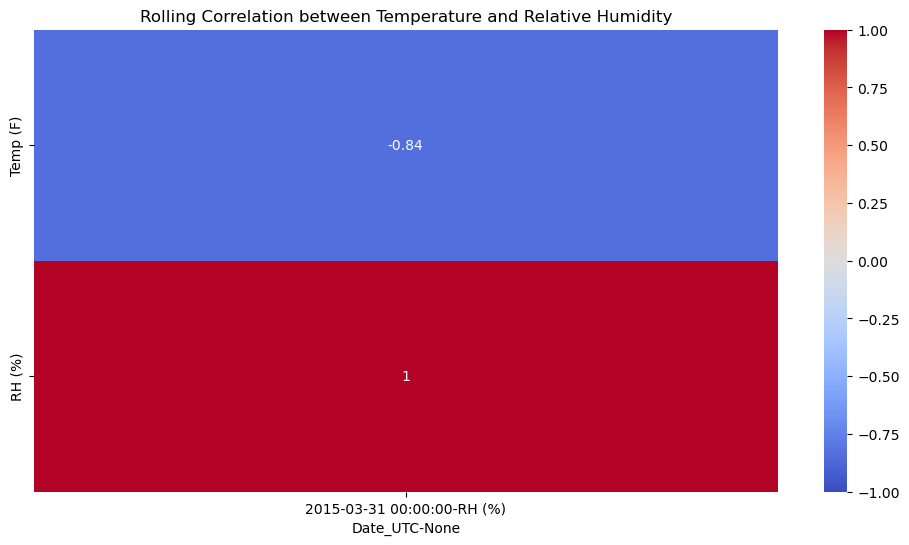

In [39]:
# Compute rolling correlation
df['Rolling Corr Temp RH'] = df['Temp (F)'].rolling(window=7).corr(df['RH (%)'])

# Plot Heatmap for Rolling Correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Temp (F)', 'RH (%)']].rolling(window=7).corr().iloc[-1:].T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Rolling Correlation between Temperature and Relative Humidity')
plt.show()


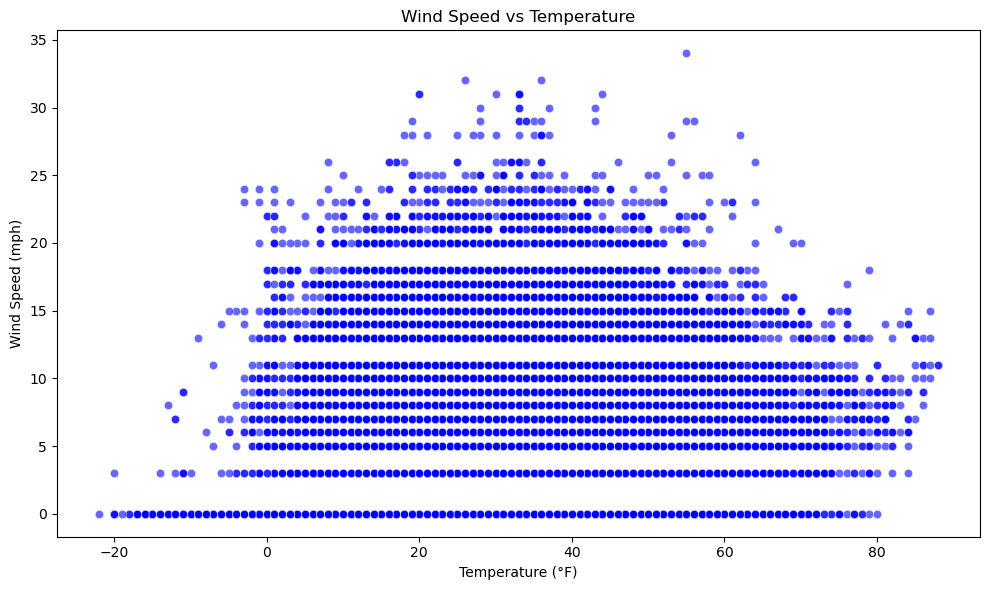

In [38]:
# Scatter plot for Wind Speed vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp (F)', y='Wind Spd (mph)', color='blue', alpha=0.6)
plt.title('Wind Speed vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.show()


**Distribution Patterns**
- Wind speed follows classic Weibull distribution
- Temperature shows normal distribution with slight right skew
- Wind direction shows clear directional preferences

**Relationships**
- Inverse relationship between wind speed and humidity
- Temperature-dependent wind speed limitations
- Clear geographical influence on wind direction

**Variability**
- Higher variability in humidity at lower wind speeds
- More consistent patterns at moderate temperatures
- Distinct seasonal and geographical patterns in wind direction

This analysis reveals complex interactions between meteorological variables, with clear patterns emerging in wind-temperature relationships and wind-humidity correlations, suggesting strong potential for predictive modeling.

# 8. Correlation of Temperature over the primary and secondary features

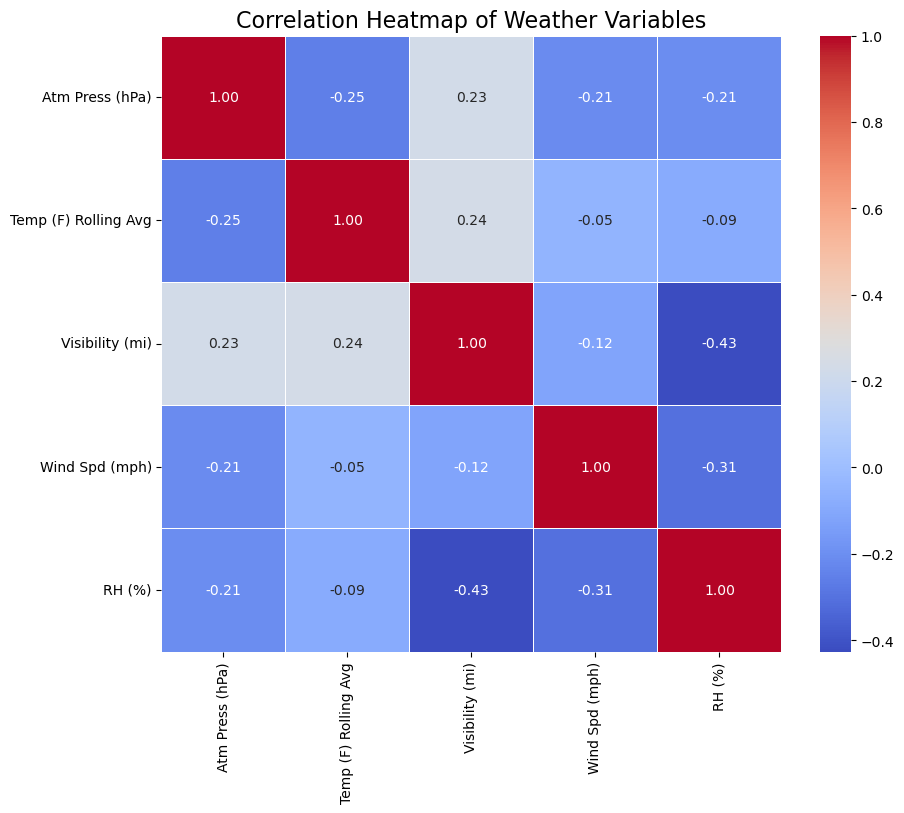

In [52]:
# Selecting features for the correlation matrix
features = ['Atm Press (hPa)', 'Temp (F) Rolling Avg', 'Visibility (mi)', 'Wind Spd (mph)', 'RH (%)']

# Correlation matrix
correlation_matrix = df[features].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables', fontsize=16)
plt.show()



# 9. Lake Michigan Weather Analysis: Final Insights

Our comprehensive analysis of Lake Michigan's weather patterns has revealed  relationships between major meteorological variables. The correlation matrix shows that while individual relationships between variables a work together to create distinct weather patterns. Most notably, visibility and relative humidity show the strongest negative correlation while temperature demonstrates complex relationships with multiple variables.

The temperature vs precipitation scatter plot reveals a clear "sweet spot" for precipitation events between 20-60°F, with peak rainfall occurring around 60°F. This pattern suggests that Lake Michigan's most active weather occurs within specific temperature ranges, while extreme temperatures tend to suppress precipitation activity.

The atmospheric pressure's relationships with other variables, though moderate, play a crucial role in weather patterns, showing consistent negative correlations with both temperature (-0.25) and wind speed (-0.21). These relationships help explain the region's weather dynamics and provide valuable insights for understanding precipitation patterns.

This exploratory data analysis tells us Lake Michigan's weather system, revealing how different variables interact to create the region's unique weather patterns. These insights will be valuable for future weather prediction modeling and understanding climate patterns in the Great Lakes region. With this understanding we can go ahead to preprocess and progress with our models to decipher insights

